In [53]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

In [21]:
img_path = "200images/intraventricular_200/brain_window/ID_0a0f59c95.jpg"
img = Image.open(img_path)
img.size

(512, 512)

The implicit folder structure for the image folder is as follows:

200images
- epidural_200
    - brain_window
        - img1.jpg
        - img2.jpg
- intraparenchymal_200
    - brain_window
        - img1.jpg
        - img2.jpg
            
...

In [32]:
# Set the path to your dataset directory
dataset_dir = '200images'

# Define a function to load images and labels
def load_data(dataset_dir, window="brain_window"):
    classes = os.listdir(dataset_dir)
    print(classes)
    images = []
    labels = []
    
    for i, cls in enumerate(classes):
        class_dir = os.path.join(dataset_dir, cls, window)
        for file in os.listdir(class_dir):
            if file.endswith('.jpg'):
                img_path = os.path.join(class_dir, file)
                img = Image.open(img_path)
                img = img.resize((512, 512))  # Resize image to 128x128 pixels
                # img = img.resize((128, 128))  # Resize image to 128x128 pixels
                img_array = np.array(img)
                images.append(img_array)
                labels.append(i)  # Assign label based on class index
    
    images = np.array(images)
    labels = np.array(labels)
    return images, labels, classes

# Load the dataset
images, labels, classes = load_data(dataset_dir)

['intraparenchymal_200', 'intraventricular_200', 'subdural_200', 'epidural_200', 'subarachnoid_200']


In [23]:
images[0].shape

(512, 512, 3)

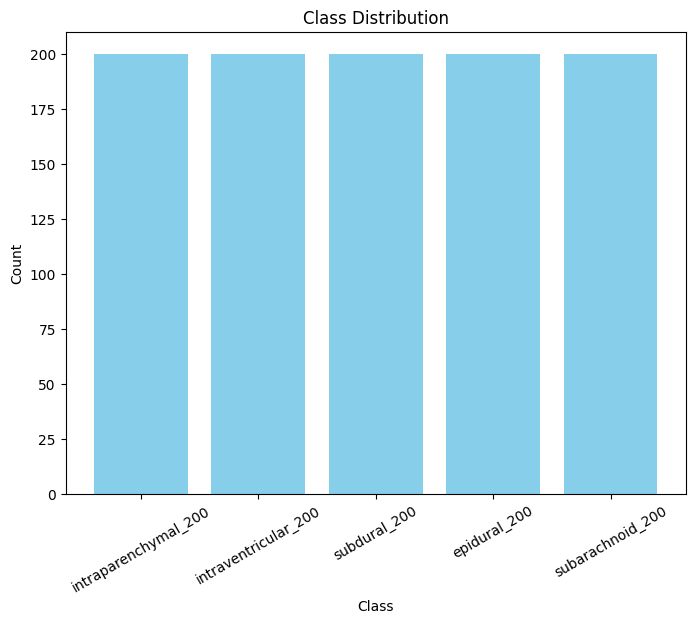

In [36]:
# Class Distribution Visualization (Pie chart or Bar chart)
def visualize_class_distribution(labels, classes):
    unique, counts = np.unique(labels, return_counts=True)
    # class_names = [f'Class {i}' for i in unique]
    plt.figure(figsize=(8, 6))
    plt.bar(classes, counts, color='skyblue')
    plt.title('Class Distribution')
    plt.xlabel('Class')
    plt.xticks(rotation=30)
    plt.ylabel('Count')
    plt.show()

visualize_class_distribution(labels, classes)

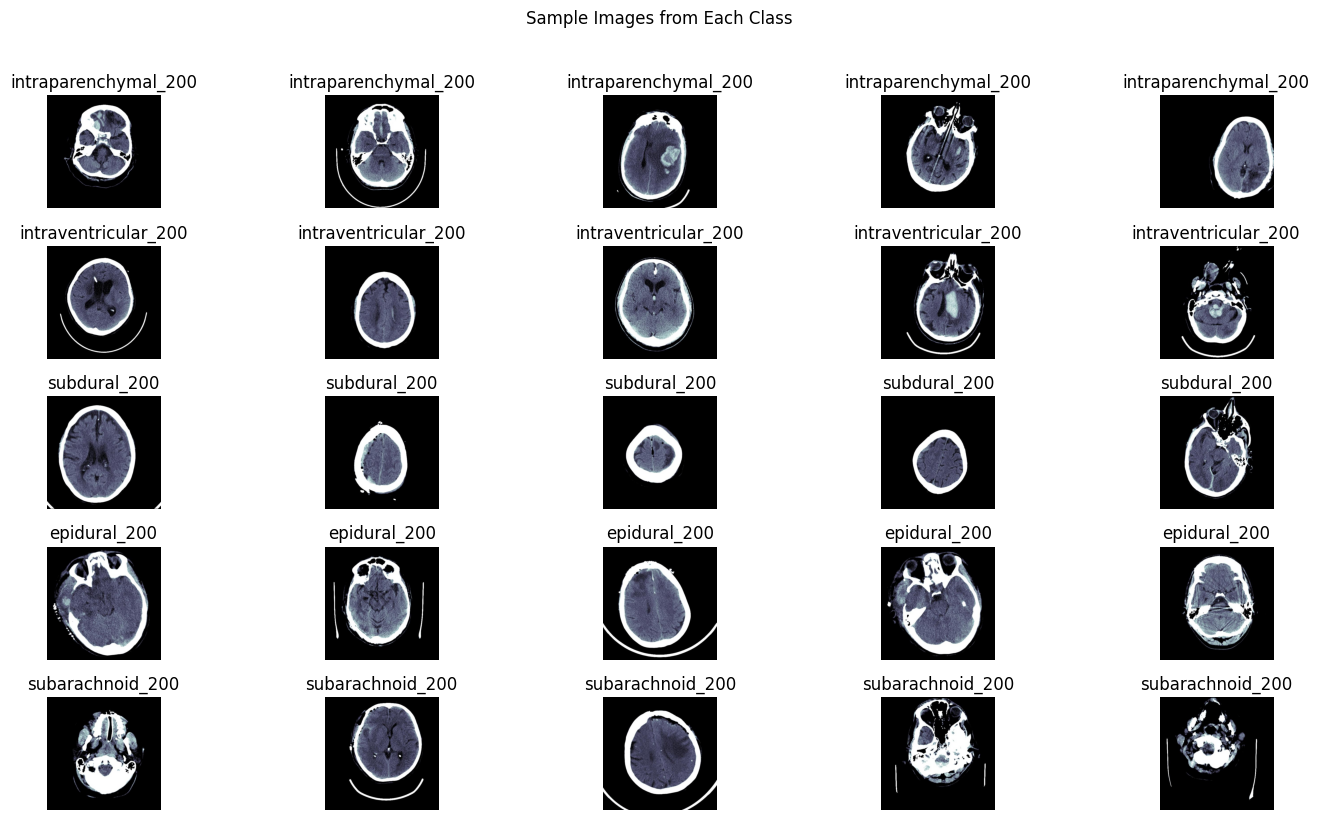

In [40]:


# Sample Image Visualization
def visualize_sample_images(images, labels, classes, num_samples=5):
    unique_labels = np.unique(labels)
    plt.figure(figsize=(15, 8))
    
    for i, (cls, class_label) in enumerate(zip(unique_labels, classes)):
        cls_images = images[labels == cls]
        for j in range(num_samples):
            plt.subplot(len(unique_labels), num_samples, i * num_samples + j + 1)
            plt.imshow(cls_images[j])
            plt.title(f'{class_label}')
            plt.axis('off')
    
    plt.suptitle('Sample Images from Each Class', y=1.02)
    plt.tight_layout()
    plt.show()

visualize_sample_images(images, labels, classes)

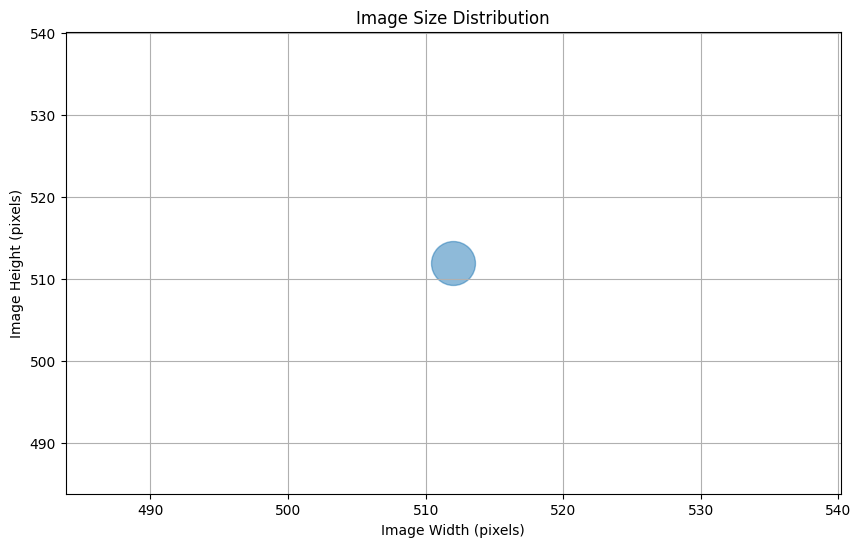

In [41]:


# Image Size Distribution
def visualize_image_size_distribution(images):
    sizes = [(img.shape[0], img.shape[1]) for img in images]
    sizes_unique, sizes_count = np.unique(sizes, return_counts=True, axis=0)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(sizes_unique[:, 0], sizes_unique[:, 1], s=sizes_count, alpha=0.5)
    plt.title('Image Size Distribution')
    plt.xlabel('Image Width (pixels)')
    plt.ylabel('Image Height (pixels)')
    plt.grid(True)
    plt.show()

visualize_image_size_distribution(images)

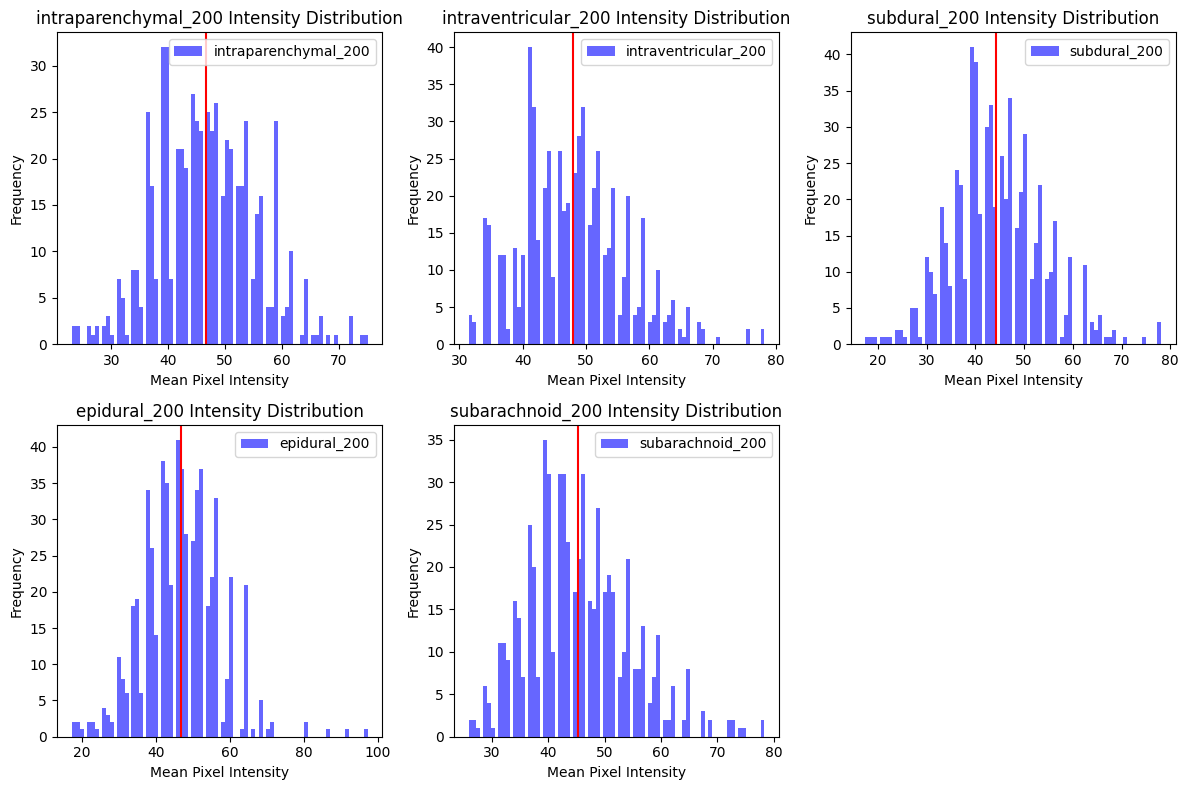

In [50]:


# Intensity Distribution
def visualize_intensity_distribution(images, labels, classes):
    unique_labels = np.unique(labels)
    plt.figure(figsize=(12, 8))
    
    for i, (cls, class_label) in enumerate(zip(unique_labels, classes)):
        cls_images = images[labels == cls]
        cls_mean_intensity = np.mean(cls_images, axis=(1, 2))  # Calculate mean intensity for each image
        
        plt.subplot(2, len(unique_labels)//2 + 1, i + 1)
        plt.hist(cls_mean_intensity, bins=20, alpha=0.6, label=f'{class_label}', facecolor='blue')
        plt.axvline(np.mean(cls_mean_intensity), color='red')
        plt.title(f'{class_label} Intensity Distribution')
        plt.xlabel('Mean Pixel Intensity')
        plt.ylabel('Frequency')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

visualize_intensity_distribution(images, labels, classes)


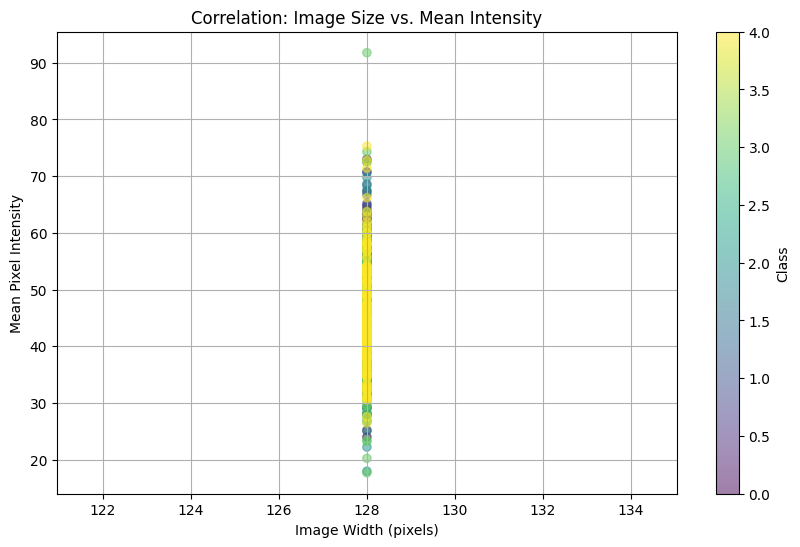

In [17]:


# Correlation Analysis (Example: Correlation between image size and intensity)
def correlation_analysis(images, labels):
    image_sizes = np.array([(img.shape[0], img.shape[1]) for img in images])
    intensity_values = np.mean(images, axis=(1, 2, 3))  # Calculate mean intensity for each image
    
    plt.figure(figsize=(10, 6))
    plt.scatter(image_sizes[:, 0], intensity_values, c=labels, cmap='viridis', alpha=0.5)
    plt.colorbar(label='Class')
    plt.title('Correlation: Image Size vs. Mean Intensity')
    plt.xlabel('Image Width (pixels)')
    plt.ylabel('Mean Pixel Intensity')
    plt.grid(True)
    plt.show()

correlation_analysis(images, labels)

(1000,)


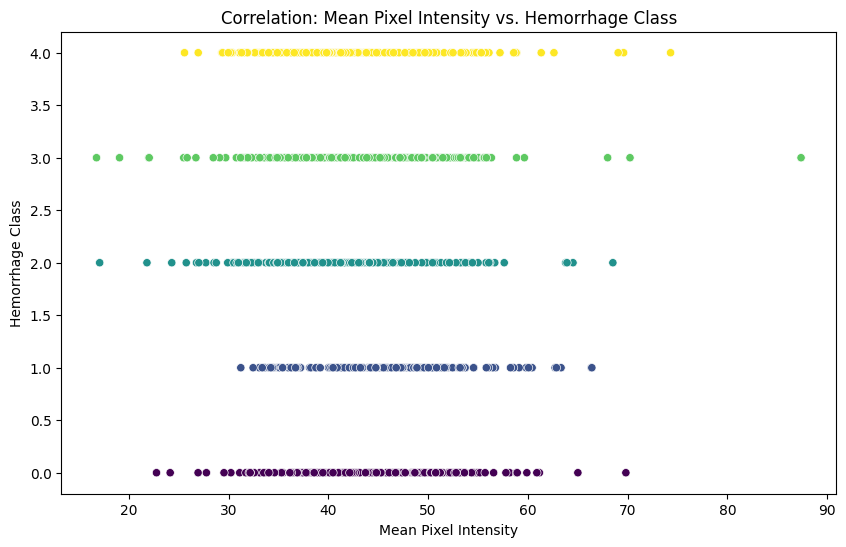

In [58]:
def correlation_analysis(images, labels):
    # Compute mean pixel intensity values for each image
    mean_intensity = np.mean(images, axis=(1, 2))

    print(mean_intensity[:,0].shape)
    
    # Plot correlation between mean intensity and hemorrhage class
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=mean_intensity[:,0], y=labels, hue=labels, palette='viridis', legend=False)
    plt.title('Correlation: Mean Pixel Intensity vs. Hemorrhage Class')
    plt.xlabel('Mean Pixel Intensity')
    plt.ylabel('Hemorrhage Class')
    plt.show()

# Example usage:
# Assuming `images` is a numpy array of images (128x128) and `labels` is an array of corresponding hemorrhage class labels
correlation_analysis(images, labels)